In [68]:
import pandas as pd # Для работы с данными
from scipy import stats # Статистика
import os
import matplotlib.pyplot as plt # Для визуализации (вариант 1)
import seaborn as sns # Для визуализации (вариант 2)
import numpy as np
from matplotlib import pyplot as plt
from phik import resources, phik_matrix # Для построения нелинейной корреляции
from sklearn import preprocessing

In [69]:
absolute_path = os.path.abspath("AI_task_1.csv")
print(absolute_path)

df = pd.read_csv(absolute_path, delimiter=',', decimal='.')
df

c:\Users\user\Desktop\PythonVSC\AI_task_1.csv


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-7.4,0.700,0.00,-,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,-,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,-,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,NaN,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [70]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar           object
chlorides               float64
free_sulfur_dioxide      object
total_sulfur_dioxide     object
density                  object
pH                       object
sulphates               float64
alcohol                  object
quality                  object
dtype: object

In [71]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
    if df[column].dtype != 'float64':
        df[column] = df[column].astype(np.float64)

df.dtypes
           


fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [72]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-7.4,0.700,0.00,NaN,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,NaN,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,NaN,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,NaN,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [73]:
print('Вывод_1: изначальный датафрейм содержал ошибки в типах данных, которые были исправлены.')

Вывод_1: изначальный датафрейм содержал ошибки в типах данных, которые были исправлены.


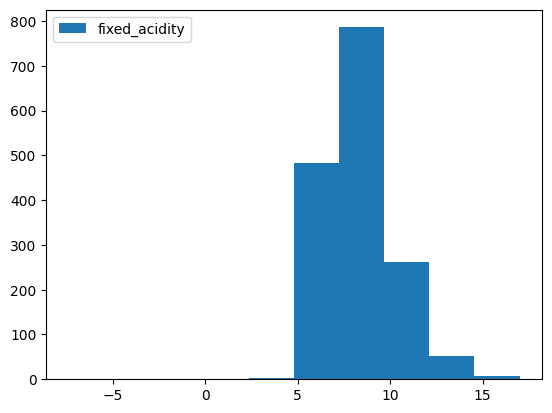

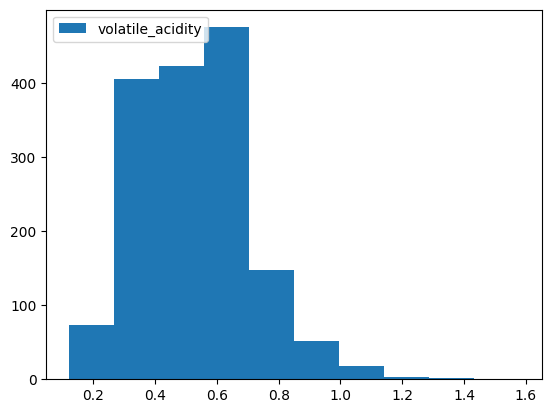

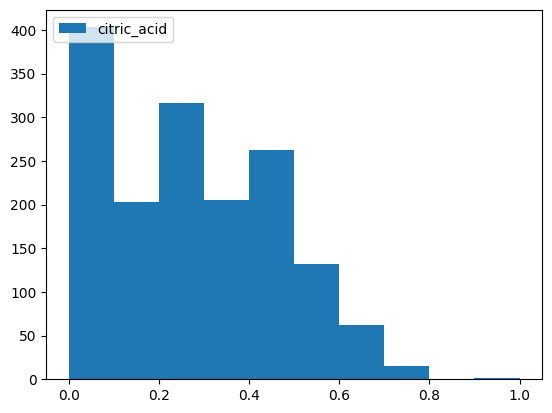

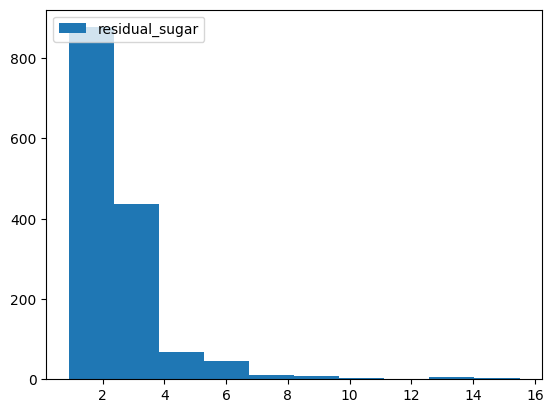

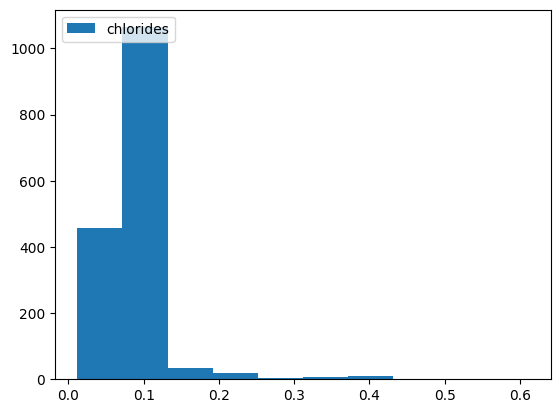

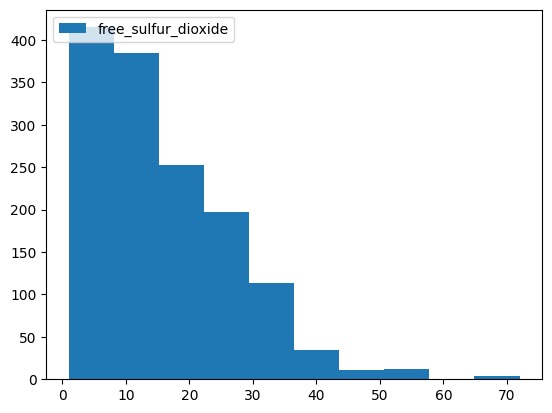

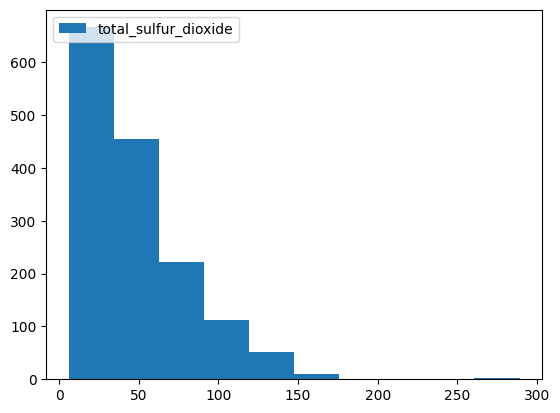

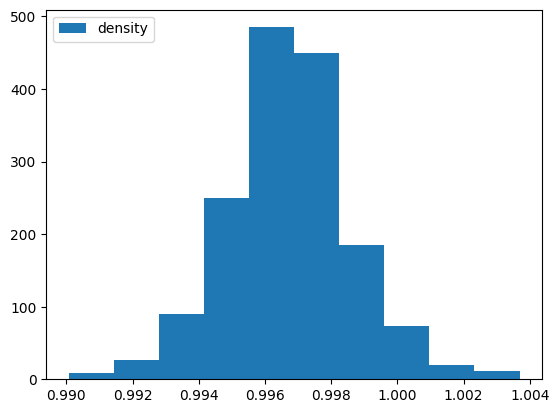

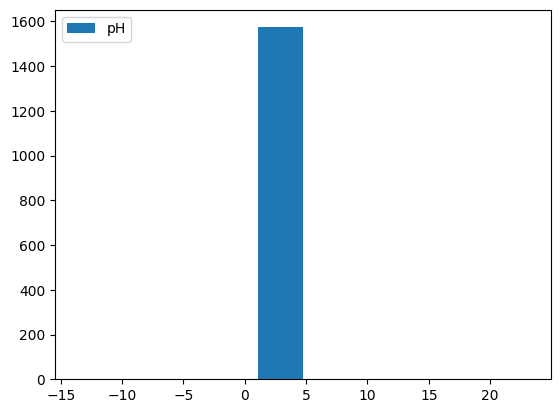

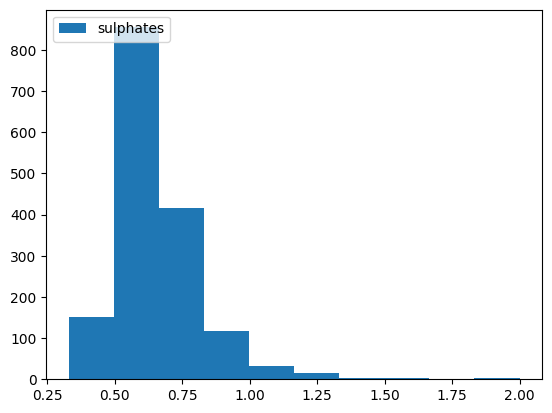

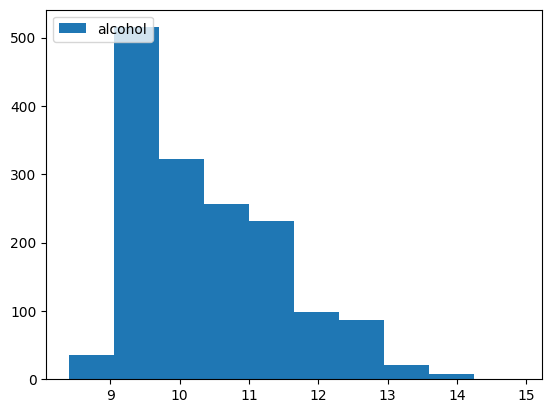

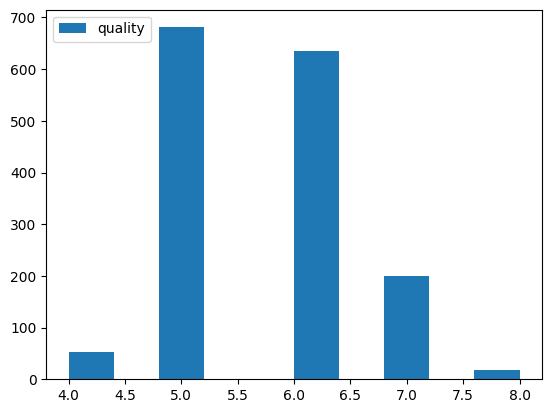

In [74]:
for column in df.columns:
    plt.hist(df[column])
    plt.legend({column}, loc='upper left')
    plt.show()

In [75]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [76]:
q_1 = df['citric_acid'].quantile(0.25)
q_3 = df['citric_acid'].quantile(0.75)
q_range = q_3 - q_1
df = df[(df['citric_acid'] < q_3 + 1.5 * q_range) & (df['citric_acid'] > q_1 - 1.5 * q_range)]

q_1 = df['sulphates'].quantile(0.25)
q_3 = df['sulphates'].quantile(0.75)
q_range = q_3 - q_1
df = df[(df['sulphates'] < q_3 + 1.5 * q_range) & (df['sulphates'] > q_1 - 1.5 * q_range)]

q_1 = df['total_sulfur_dioxide'].quantile(0.25)
q_3 = df['total_sulfur_dioxide'].quantile(0.75)
q_range = q_3 - q_1
df = df[(df['total_sulfur_dioxide'] < q_3 + 1.5 * q_range) & (df['total_sulfur_dioxide'] > q_1 - 1.5 * q_range)]	

q_1 = df['free_sulfur_dioxide'].quantile(0.25)
q_3 = df['free_sulfur_dioxide'].quantile(0.75)
q_range = q_3 - q_1
df = df[(df['free_sulfur_dioxide'] < q_3 + 1.5 * q_range) & (df['free_sulfur_dioxide'] > q_1 - 1.5 * q_range)]

q_1 = df['chlorides'].quantile(0.25)
q_3 = df['chlorides'].quantile(0.75)
q_range = q_3 - q_1
df = df[(df['chlorides'] < q_3 + 1.5 * q_range) & (df['chlorides'] > q_1 - 1.5 * q_range)]

q_1 = df['residual_sugar'].quantile(0.25)
q_3 = df['residual_sugar'].quantile(0.75)
q_range = q_3 - q_1
df = df[(df['residual_sugar'] < q_3 + 1.5 * q_range) & (df['residual_sugar'] > q_1 - 1.5 * q_range)]

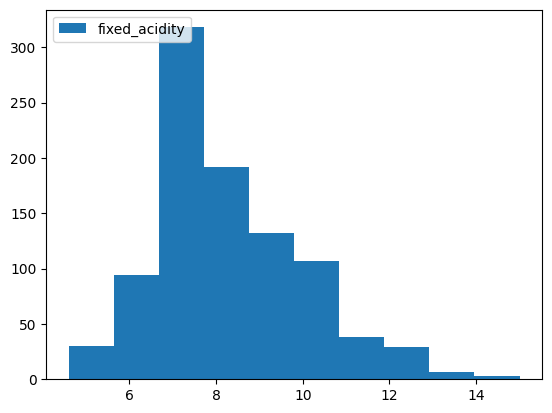

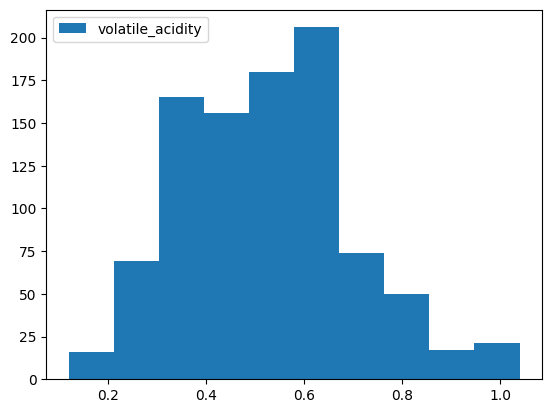

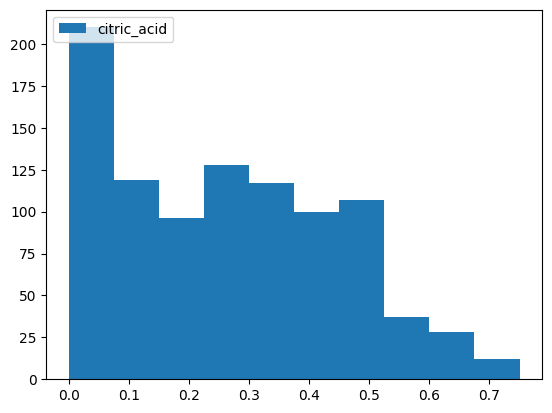

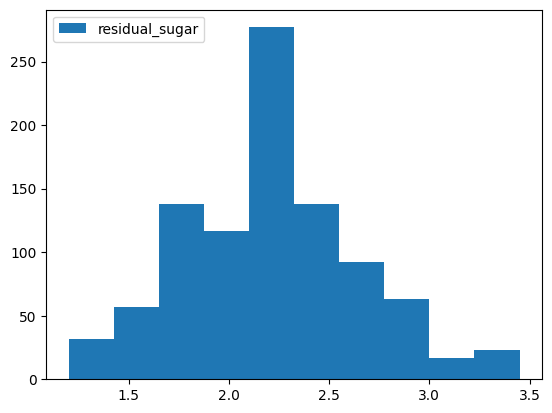

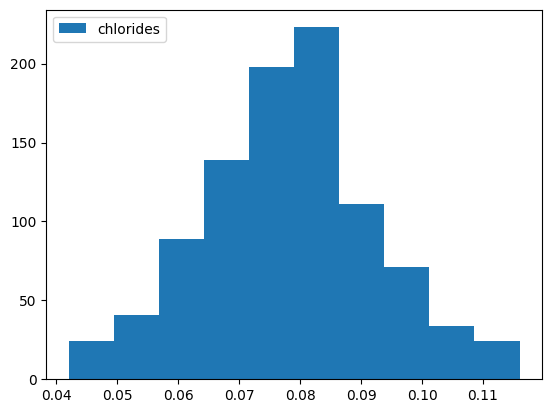

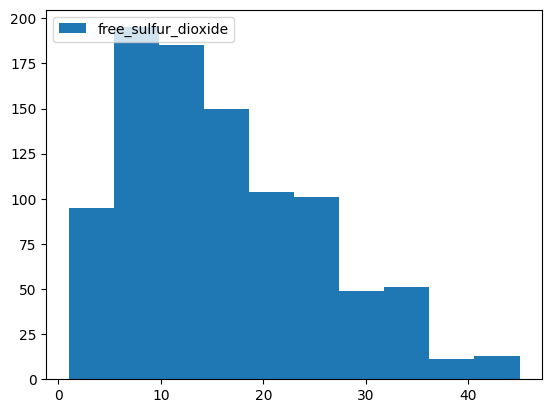

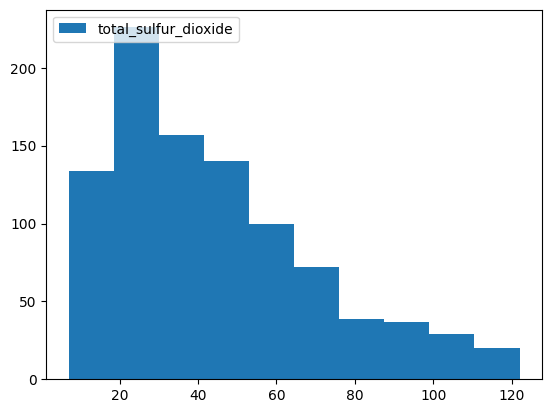

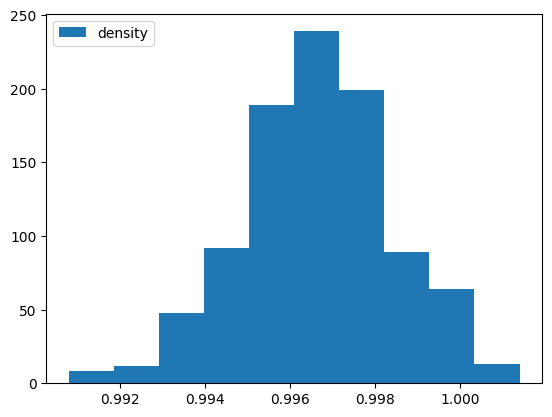

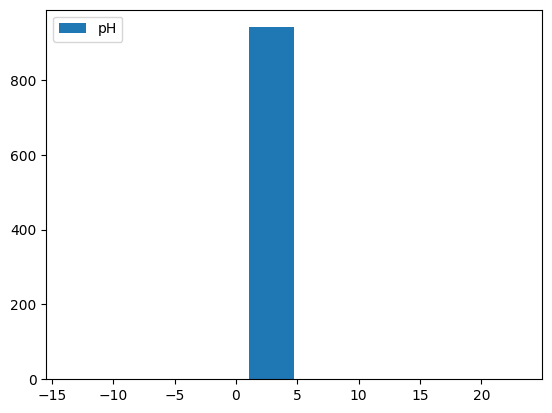

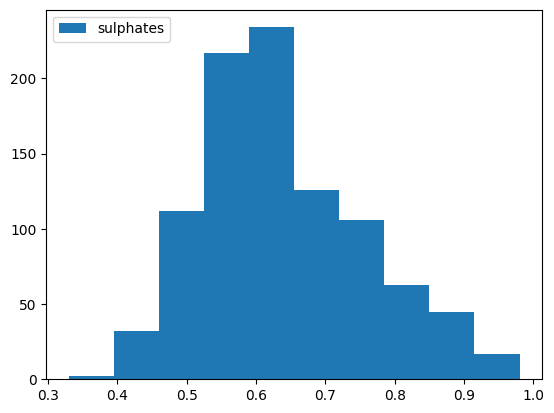

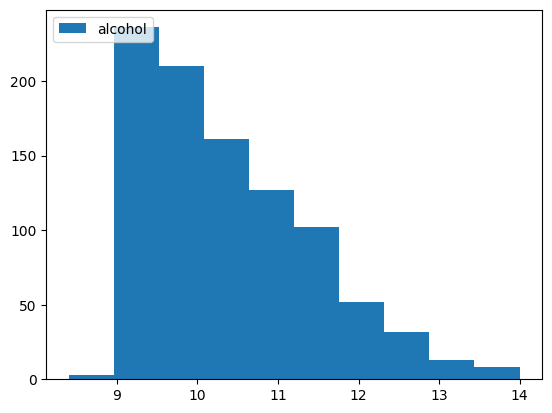

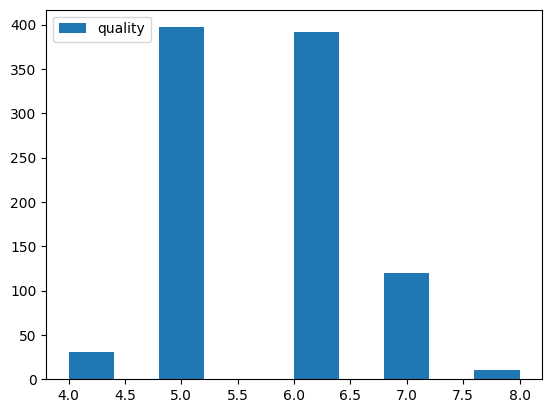

In [77]:
for column in df.columns:
    plt.hist(df[column])
    plt.legend({column}, loc='upper left')
    plt.show()

In [78]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0


In [79]:
print('Вывод_2: все аномалии заменены ранее на значения NaN, в наборе данных они могли появиться из-за ошибки ввода. Все выбросы удалены методом квартильного диапазона.')

Вывод_2: все аномалии заменены ранее на значения NaN, в наборе данных они могли появиться из-за ошибки ввода. Все выбросы удалены методом квартильного диапазона.


In [80]:
print('всего строк: '+str(len(df)))
print('всего значений: '+str(df.size))
print('всего пропусков: '+ str(df.isnull().sum().sum()))
print('суммарная доля пропусков от всех значений: ' + str(df.isnull().sum().sum() / df.size))
print('пропусков на столбец:')
print(df.isnull().sum())
print('доля пропусков на столбец:')
print(df.isnull().mean())

всего строк: 954
всего значений: 11448
всего пропусков: 27
суммарная доля пропусков от всех значений: 0.0023584905660377358
пропусков на столбец:
fixed_acidity            4
volatile_acidity         0
citric_acid              0
residual_sugar           0
chlorides                0
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  1
pH                       9
sulphates                0
alcohol                 10
quality                  3
dtype: int64
доля пропусков на столбец:
fixed_acidity           0.004193
volatile_acidity        0.000000
citric_acid             0.000000
residual_sugar          0.000000
chlorides               0.000000
free_sulfur_dioxide     0.000000
total_sulfur_dioxide    0.000000
density                 0.001048
pH                      0.009434
sulphates               0.000000
alcohol                 0.010482
quality                 0.003145
dtype: float64


In [81]:
df = df.dropna()
df


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0


In [82]:
print('Вывод_3: кол-во пропусков увеличилось, ввиду того, что до этого все выбросы были заменены на значения NaN, в качестве решения было выбрано удаление строк с пропусками.')

Вывод_3: кол-во пропусков увеличилось, ввиду того, что до этого все выбросы были заменены на значения NaN, в качестве решения было выбрано удаление строк с пропусками.


In [83]:
print('кол-во дубликатов строк:' + str(df.duplicated().sum()))
x = 0
for column in df.columns:
    print('различные дубликаты в '+str(column)+' '+str(df[column].duplicated().sum()))
    x+=df[column].duplicated().sum()
print('кол-во различных дубликатов всего: ' + str(x))
print('число строк: '+str(len(df)))
print('число значений: '+str(df.size))
print('процент дубликатов от всех значений: ' + str(x/df.size))
    

кол-во дубликатов строк:140
различные дубликаты в fixed_acidity 840
различные дубликаты в volatile_acidity 803
различные дубликаты в citric_acid 854
различные дубликаты в residual_sugar 896
различные дубликаты в chlorides 856
различные дубликаты в free_sulfur_dioxide 888
различные дубликаты в total_sulfur_dioxide 822
различные дубликаты в density 603
различные дубликаты в pH 846
различные дубликаты в sulphates 867
различные дубликаты в alcohol 875
различные дубликаты в quality 922
кол-во различных дубликатов всего: 10072
число строк: 927
число значений: 11124
процент дубликатов от всех значений: 0.9054297015462064


In [84]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0


In [85]:
df = df.drop_duplicates() 
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6.0
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0


In [86]:
print('Вывод_4: кол-во дубликатов в массиве хим. значений значительно ввиду специфики этой темы, удалять их нет смысла - как пример, могут сущестовать в реальности два разных, или даже два одинаковых, раствора одной концентарции или с одним значением pH, то есть эти значения не уникальны.')

Вывод_4: кол-во дубликатов в массиве хим. значений значительно ввиду специфики этой темы, удалять их нет смысла - как пример, могут сущестовать в реальности два разных, или даже два одинаковых, раствора одной концентарции или с одним значением pH, то есть эти значения не уникальны.


<Axes: >

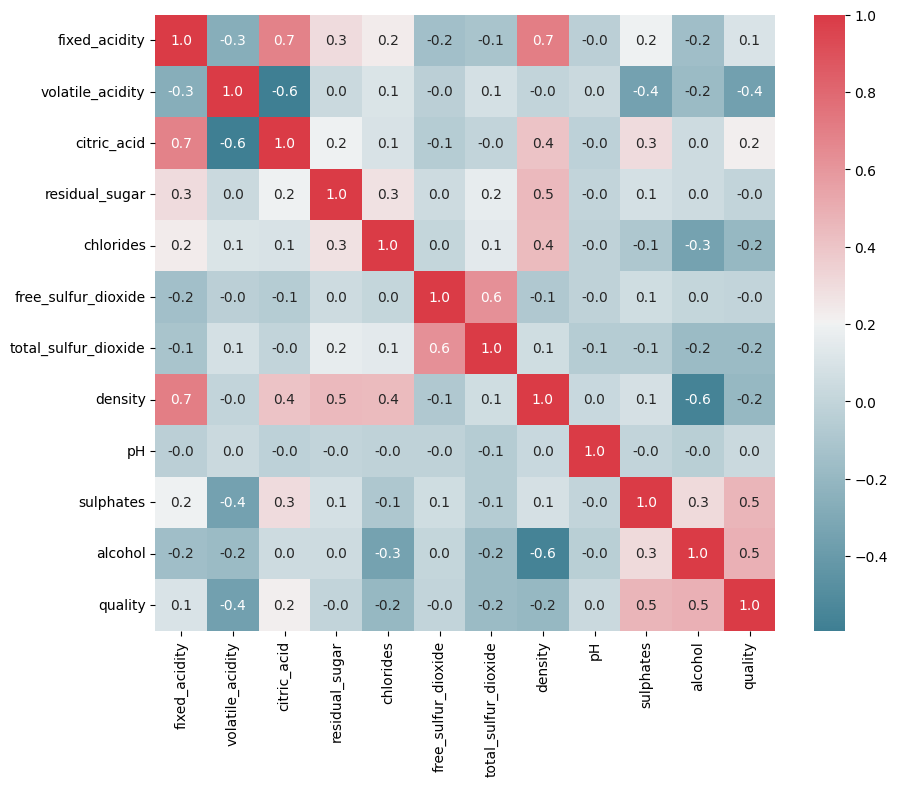

In [87]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10, 8)) # создание графика и определение его размеров

cmap = sns.diverging_palette(220, 10, as_cmap=True) # создание палитры для более визуально-понятного отображения корреляций

sns.heatmap(
    corr, # матрица корреляций Пирсона
    cmap=cmap, # палитра
    annot=True, # вывод коэффициентов корреляции
    fmt=".1f" # число знаков после запятой
)

In [88]:
print('Вывод_5: коэффициент корреляции Пирсона является мерой линейной зависимости между двумя переменными. Значение коэффициента Пирсона варьируется от -1 до 1, где значения, близкие к 1 или -1, указывают на сильную линейную зависимость, а значения, близкие к 0, указывают на слабую или отсутствующую зависимость. К недостаткам линейной корреляции относятся: чувствительность к выбросам, она не указывает на причинно-следственную связь, невозможность выявить нелинейную зависимость между переменными.')

Вывод_5: коэффициент корреляции Пирсона является мерой линейной зависимости между двумя переменными. Значение коэффициента Пирсона варьируется от -1 до 1, где значения, близкие к 1 или -1, указывают на сильную линейную зависимость, а значения, близкие к 0, указывают на слабую или отсутствующую зависимость. К недостаткам линейной корреляции относятся: чувствительность к выбросам, она не указывает на причинно-следственную связь, невозможность выявить нелинейную зависимость между переменными.


interval columns not set, guessing: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


<Axes: >

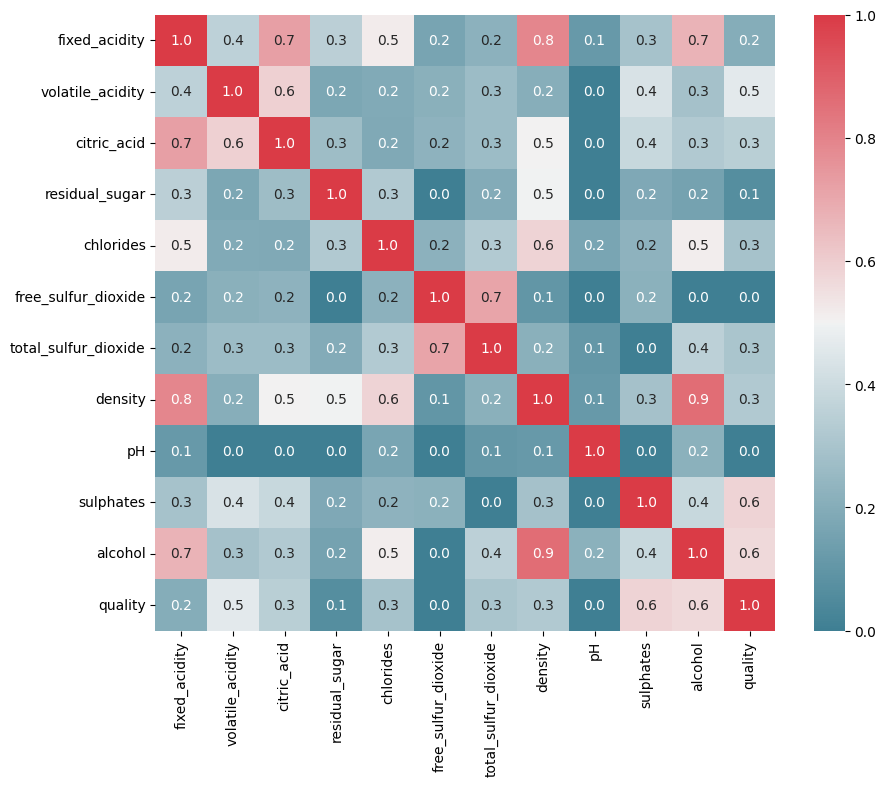

In [89]:
phik_corr_matrix = df.phik_matrix() 


f, ax = plt.subplots(figsize=(10, 8)) # создание графика и определение его размеров

cmap = sns.diverging_palette(220, 10, as_cmap=True) # создание палитры для более визуально-понятного отображения корреляций

sns.heatmap(
    phik_corr_matrix, # матрица корреляций фика
    cmap=cmap, # палитра
    annot=True, # вывод коэффициентов корреляции
    fmt=".1f" # число знаков после запятой
)

In [90]:
print('Вывод_6: метод Фика, в отличие от Пирсона, фиксирует нелинейные зависимости, а также включает в расчет категориальные признаки(переменные, которые представляют категории или метки, а не числовые значения). Оценка корреляции здесь варьируется от 0 до 1, а не от -1 до 1. Он возвращается к коэффициенту корреляции Пирсона в случае двумерного нормального распределения входных данных. ')

Вывод_6: метод Фика, в отличие от Пирсона, фиксирует нелинейные зависимости, а также включает в расчет категориальные признаки(переменные, которые представляют категории или метки, а не числовые значения). Оценка корреляции здесь варьируется от 0 до 1, а не от -1 до 1. Он возвращается к коэффициенту корреляции Пирсона в случае двумерного нормального распределения входных данных. 


In [91]:
print('Вывод_7: 1 - да, существует неполная положительная корреляция между alcohol и quality'+'\n'+'         2 - нет, корреляция между residual sugar и quality практически отсутствует')

Вывод_7: 1 - да, существует неполная положительная корреляция между alcohol и quality
         2 - нет, корреляция между residual sugar и quality практически отсутствует


In [92]:
median_alcohol = df['alcohol'].median()
high_alcohol = df[df['alcohol'] > median_alcohol]['quality']
low_alcohol = df[df['alcohol'] <= median_alcohol]['quality']

statistic_alcohol, pvalue_alcohol = stats.ttest_ind(a=high_alcohol, b=low_alcohol) 

median_sugar = df['residual_sugar'].median()
high_sugar = df[df['residual_sugar'] > median_sugar]['quality']
low_sugar = df[df['residual_sugar'] <= median_sugar]['quality']

statistic_sugar, pvalue_sugar = stats.ttest_ind(a=high_sugar, b=low_sugar) 

print('Ttest_indResult(statistic_alcohol = '+str(statistic_alcohol)+', pvalue_alcohol = '+str(pvalue_alcohol))
print('\n'+'Ttest_indResult(statistic_sugar = '+str(statistic_sugar)+', pvalue_sugar = '+str(pvalue_sugar)+'\n')

alpha = 0.05 
if pvalue_alcohol < alpha:
    print("pvalue_alcohol Отвергаем нулевую гипотезу, присутствует разница в качестве вина")
else:
    print("pvalue_alcohol Не отвергаем нулевую гипотезу, разница в качестве вина отсутствует")
    
if pvalue_sugar < alpha:
    print("pvalue_sugar Отвергаем нулевую гипотезу, присутствует разница в качестве вина")
else:
    print("pvalue_sugar Не отвергаем нулевую гипотезу, разница в качестве вина отсутствует")


Ttest_indResult(statistic_alcohol = 12.722646250857773, pvalue_alcohol = 7.558605590292283e-34

Ttest_indResult(statistic_sugar = 1.1388741361200907, pvalue_sugar = 0.25510307753617967

pvalue_alcohol Отвергаем нулевую гипотезу, присутствует разница в качестве вина
pvalue_sugar Не отвергаем нулевую гипотезу, разница в качестве вина отсутствует


In [93]:
print('Вывод_8: качество вина различается для вин с низким и высоким содержанием алкоголя. У вин с разным содержанием сахара, разница в качестве отсутстсвует/не значительна')

Вывод_8: качество вина различается для вин с низким и высоким содержанием алкоголя. У вин с разным содержанием сахара, разница в качестве отсутстсвует/не значительна


In [94]:
print('Гипотезы: Различается ли качество вина с высоким и низким значением плотности density? Различается ли плотность вина для высоких и низких показателей фиксированной кислотности fixed acidity')
median_density = df['density'].median()
high_density = df[df['density'] > median_density]['quality']
low_density = df[df['density'] <= median_density]['quality']

statistic_density, pvalue_density = stats.ttest_ind(a=high_density, b=low_density) 

median_fixed_acidity = df['fixed_acidity'].median()
high_fixed_acidity = df[df['fixed_acidity'] > median_fixed_acidity]['density']
low_fixed_acidity = df[df['fixed_acidity'] <= median_fixed_acidity]['density']

statistic_fixed_acidity, pvalue_fixed_acidity = stats.ttest_ind(a=high_fixed_acidity, b=low_fixed_acidity) 

print('Ttest_indResult(statistic_density = '+str(statistic_density)+', pvalue_density = '+str(pvalue_density))
print('Ttest_indResult(statistic_fixed_acidity = '+str(statistic_fixed_acidity)+', pvalue_fixed_acidity = '+str(pvalue_fixed_acidity)+'\n')

alpha = 0.05 
if pvalue_density < alpha:
    print("pvalue_density Отвергаем нулевую гипотезу, присутствует разница в качестве вина")
else:
    print("pvalue_density Не отвергаем нулевую гипотезу, разница в качестве вина отсутствует")
    
if pvalue_fixed_acidity < alpha:
    print("pvalue_fixed_acidity Отвергаем нулевую гипотезу, присутствует разница в плотности вина")
else:
    print("pvalue_fixed_acidity Не отвергаем нулевую гипотезу, разница в плотности отсутствует")

Гипотезы: Различается ли качество вина с высоким и низким значением плотности density? Различается ли плотность вина для высоких и низких показателей фиксированной кислотности fixed acidity
Ttest_indResult(statistic_density = -3.60386989991395, pvalue_density = 0.00033328284663002906
Ttest_indResult(statistic_fixed_acidity = 17.910499129728414, pvalue_fixed_acidity = 2.0758523497404787e-60

pvalue_density Отвергаем нулевую гипотезу, присутствует разница в качестве вина
pvalue_fixed_acidity Отвергаем нулевую гипотезу, присутствует разница в плотности вина


In [95]:
print('Вывод_9: Были проверены две гипотезы: качество вина различается для вин с низкой и высокой плотностью. У вин с разными показателями fixed_acidity присутствует различие в плотности')

Вывод_9: Были проверены две гипотезы: качество вина различается для вин с низкой и высокой плотностью. У вин с разными показателями fixed_acidity присутствует различие в плотности


In [96]:
print('Показатель pH не является категориальным в абсолютном смысле, показатель качества - является категориальным')

Показатель pH не является категориальным в абсолютном смысле, показатель качества - является категориальным


In [97]:
from sklearn.preprocessing import OneHotEncoder


onehotencoder = OneHotEncoder()
data_en = onehotencoder.fit_transform(df[['quality']])
pd.DataFrame(data_en.toarray(),
columns=onehotencoder.categories_).head(10)


,4.0,5.0,6.0,7.0,8.0
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


In [98]:
df.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,787.000000,787.00000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,8.268361,0.52378,0.258158,2.219314,0.078213,15.964422,44.771283,0.996616,3.314041,0.634371,10.403071,5.645489
std,1.696630,0.17339,0.185093,0.435768,0.014335,9.284656,26.939590,0.001753,0.971757,0.117411,1.026529,0.786408
min,4.600000,0.12000,0.000000,1.200000,0.042000,1.000000,7.000000,0.990840,-13.630000,0.330000,8.400000,4.000000
25%,7.100000,0.39000,0.090000,2.000000,0.069000,8.000000,24.000000,0.995500,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.52000,0.240000,2.200000,0.078000,15.000000,38.000000,0.996600,3.320000,0.610000,10.100000,6.000000
75%,9.150000,0.63000,0.400000,2.500000,0.087000,22.000000,60.000000,0.997800,3.410000,0.710000,11.000000,6.000000
max,15.000000,1.04000,0.750000,3.450000,0.116000,45.000000,122.000000,1.001400,23.120000,0.980000,14.000000,8.000000


In [99]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6.0
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0


In [100]:

min_max_scaler = preprocessing.MinMaxScaler()
df.loc[:, ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']] = min_max_scaler.fit_transform(df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']])

df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,0.307692,0.826087,0.000000,0.622222,0.756757,0.545455,0.521739,0.564394,0.457959,0.538462,0.250000,0.25
2,0.307692,0.695652,0.053333,0.488889,0.675676,0.318182,0.408696,0.583333,0.459592,0.492308,0.250000,0.25
5,0.269231,0.586957,0.000000,0.266667,0.445946,0.272727,0.286957,0.659091,0.466395,0.353846,0.178571,0.25
6,0.317308,0.521739,0.080000,0.177778,0.364865,0.318182,0.452174,0.526515,0.460680,0.200000,0.178571,0.25
7,0.259615,0.576087,0.000000,0.000000,0.310811,0.318182,0.121739,0.356061,0.463129,0.215385,0.285714,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
1590,0.163462,0.467391,0.200000,0.266667,0.472973,0.568182,0.243478,0.217803,0.461224,0.753846,0.571429,0.50
1591,0.076923,0.673913,0.120000,0.222222,0.635135,0.340909,0.165217,0.301136,0.470748,0.353846,0.571429,0.50
1592,0.163462,0.423913,0.173333,0.488889,0.459459,0.636364,0.286957,0.464015,0.463946,0.646154,0.464286,0.50
1594,0.153846,0.521739,0.106667,0.355556,0.648649,0.704545,0.321739,0.384470,0.464762,0.384615,0.375000,0.25


In [101]:
print('Вывод_10: да, диапазоны данных различаются. Для масштабирования использовался MinMaxScaler')

Вывод_10: да, диапазоны данных различаются. Для масштабирования использовался MinMaxScaler
